In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.optimize import curve_fit

We first write a function for the Hamster's velocity.

In [2]:
def hamster_velocity(alpha,T):
    # alpha parameter
    # T = total time
    # returns array of v_t as a function of t
    
    v = [0]*T
    for t in range(1,T):
        Stm1 = [-1,1][random.randrange(2)]
        v[t] = v[t-1] - alpha*v[t-1] + Stm1
    
    return v

We then plot v_t for the the specified alpha up to T=10000.

Text(0, 0.5, '$v_t$')

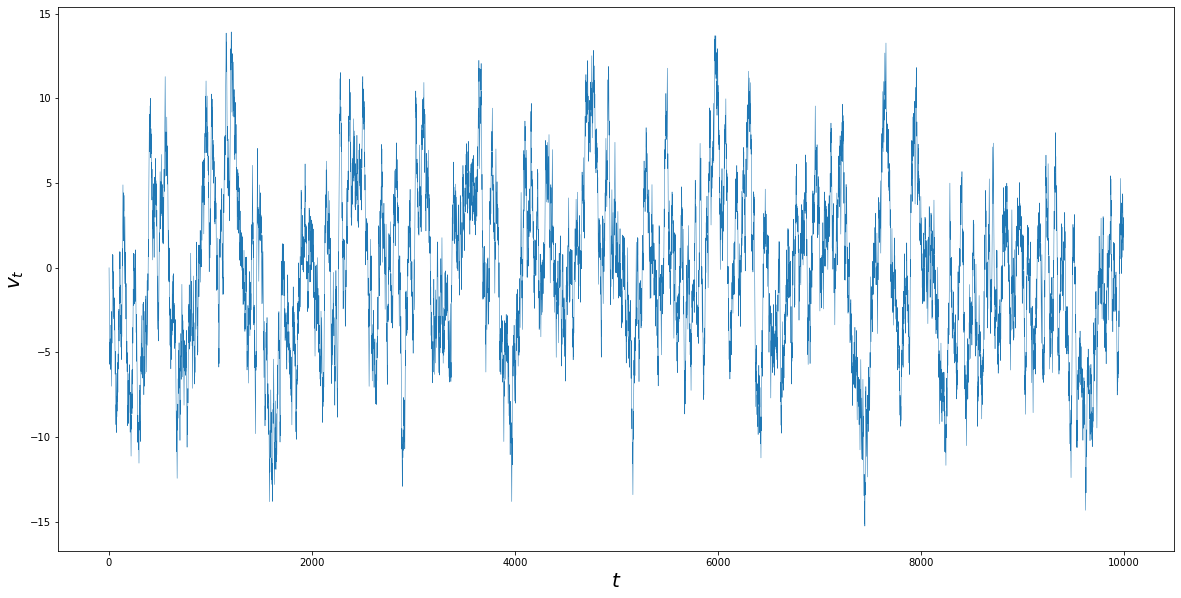

In [33]:
alpha = 0.02
T = 10000
v = hamster_velocity(alpha,T)

plt.figure(figsize=(20,10))

plt.plot(np.arange(T),v, linewidth=0.5)

plt.xlabel(r'$t$',fontsize=20)
plt.ylabel(r'$v_t$',fontsize=20)

We then write functions to compute <v(t)v(t')> and for the proposed fit.

In [4]:
def average(alpha,n,T,tp):
    # n = number of walks
    # T = total time
    # tp = time choice
    # returns <v(t)v(t')>
    
    vt_vtp = np.zeros((n,T))
    
    for i in range(n): 
        v = hamster_velocity(alpha,T) 
        vt_vtp[i] = np.array(v)*v[tp]
    
    avg_vt_vtp = np.abs(np.sum(vt_vtp,axis=0))/n
    
    return avg_vt_vtp

def exp(t,A,B):
    return A*np.exp(-B*np.abs(t))

We average over 10000 simulations, each of length T=1000.

In [5]:
alpha = 0.02
n = 1000
T = 1000
tp = int(0.9*T)

avg = average(alpha,n,T,tp)

Let's check the results.

/opt/anaconda3/envs/fast/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


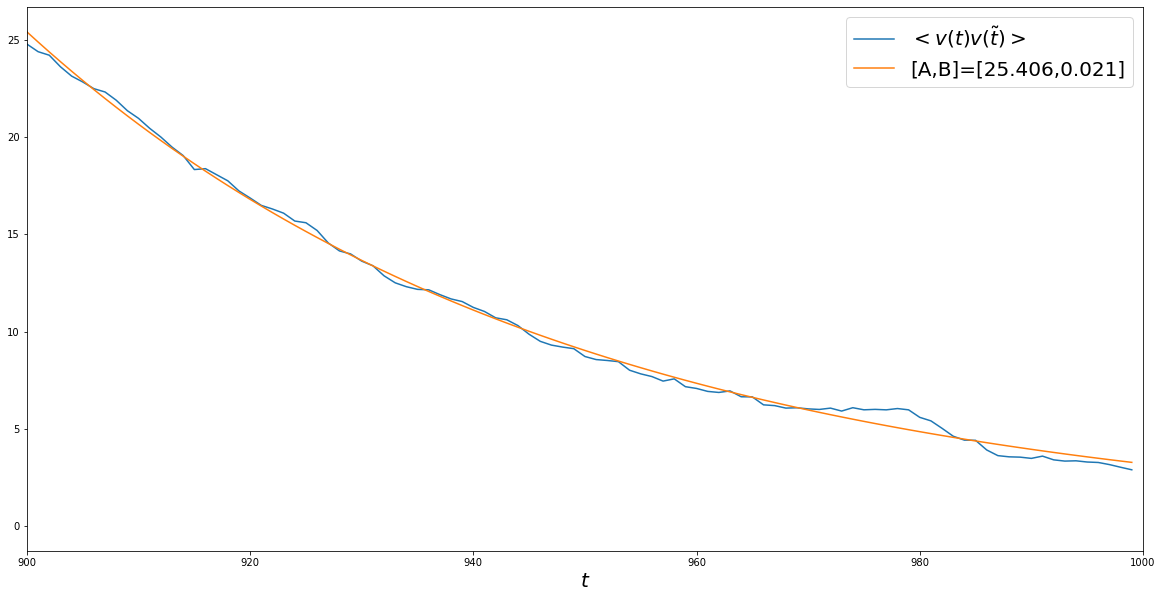

In [6]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(T),avg, label=r'$<v(t)v(\tilde{t})>$')

params, cov = curve_fit(exp, np.arange(T)[tp:]-tp, avg[tp:])
A,B = params

label = '[A,B]=[' + str("%.3f" % A) + ',' + str("%.3f" % B) + ']'

plt.xlim(tp,T)

plt.xlabel(r'$t$',fontsize=20)

plt.plot(np.arange(T)[tp:], exp(np.arange(T)[tp:]-tp,A,B),label=label)

plt.legend(fontsize=20)

We observe that the exponential function is a good fit for <v(t)v(t')> at late times. In particular, by inspecting the parameters we estimate that A=1/(2alpha) and B=alpha. Let's confirm this by varying A and B.

In [7]:
alphas = np.linspace(0,0.04,50)
avg_alpha = [0]*len(alphas)
for i in range(len(alphas)):
    avg_alpha[i] = average(alphas[i],n,T,tp)

In [8]:
As = [0]*len(alphas)
Bs = [0]*len(alphas)

for i in range(len(alphas)):
    params, cov = curve_fit(exp, np.arange(T)[tp:]-tp, avg_alpha[i][tp:])
    A,B = params
    As[i] = A
    Bs[i] = B

/opt/anaconda3/envs/fast/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/envs/fast/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


Here are the resulting A and B dependences on alpha.

Text(0.5, 0, '$\\alpha$')

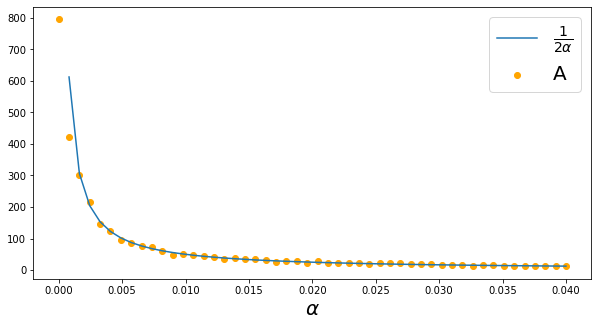

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(alphas,As,label='A',color='orange')
plt.plot(alphas[1:],1/(2*alphas[1:]),label=r'$\frac{1}{2\alpha}$')
plt.legend(fontsize=20)
plt.xlabel(r'$\alpha$',fontsize=20)

Text(0.5, 0, '$\\alpha$')

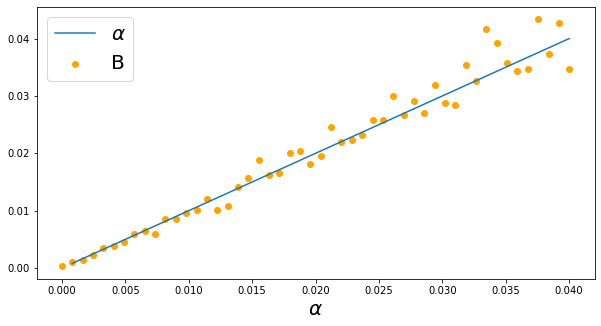

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(alphas,Bs,label='B',color='orange')
plt.plot(alphas[1:],alphas[1:],label=r'$\alpha$')
plt.legend(fontsize=20)
plt.xlabel(r'$\alpha$',fontsize=20)

The proposed dependencies of A and B on alpha were evidently correct.

Since A has L^2/T^2 units, by dimensional analysis, the temperature is

T = Am/k_b (= alpha*m/k_b)

where m is the mass of the hamster and k_b is Boltzmann's constant. Numerically,

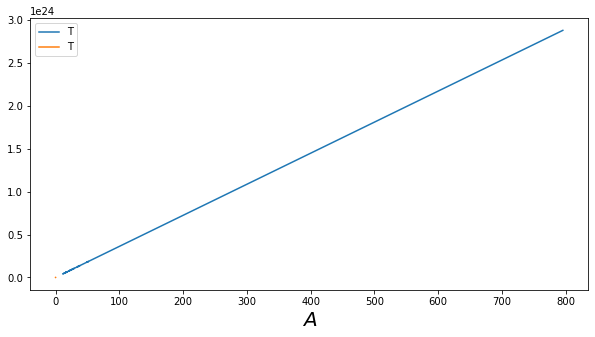

In [39]:
m = 0.05 #kg
k_b = 1.38e-23 #J/K

plt.figure(figsize=(10,5))
plt.plot(As, np.array(As)*m/k_b,label='T')
plt.plot(alphas, np.array(alphas)*m/k_b,label='T')
plt.xlabel(r'$A$',fontsize=20)
plt.legend()

This is one hot hamster.